# Library and Museum Funding by Party Government Breakdown

## Data

### Description of data, variables studied, and data obtain methods

I obtained data from several sources such as the IMLS and House of Representative Historical websites.  

First, I downloaded a CSV file of the IMLS funding data, which contained the following features: 

    - Log Number: unique identification for each institution (ie: LS-253634-OLS-23). I did not analyze "log number" as it is difficult for human users to understand.
    - Description: description of the program. I did not include this feature as it is not relevant to the analysis.  
    - Supplemental Indicator: whether the program contains additional information. I did not include this feature as it is not relevant to the analysis. 
    - Institution: name of institution that is receiving the IMLS funding (ie: Library of Michigan)
    - Fiscal Year: the year the funding is granted for (ie: 2023)
    - Program: name of program that the IMLS is funding (ie: Grants to State Library Administrative Agencies). Different institutions may share the same program names
    - Federal Funds: the awarded monetary amount (ie: $4,831,975)
    - Funding Office: categorize to states libraries, library services, museum services, and other intitiatives (ie: Grants to State Libraries)
    - City: city in which the institution is located in (ie: Lansing)
    - State: state in which the institution is located in (ie: MI)

Second, I scraped web data from the House of Representative Historical website, which contained the following features:

    - Congress: the nth-number of Congress in history and the respective years (ie: 35th (1857-1859)). I repeated the values twice to span 2 years terms and to create a matching column to join the IMLS dataset.
    - House Majority: the majority party in the House of Representative (ie: Democrats). Values are repeated twice
    - Senate Majority: the majority party in the Senate (ie: Democrats). Values are repeated twice
    - Presidency: the President's party (ie: Democrat (Buchanan)). Values are repeated twice
    - Party Government: whether government has unified control (ie: Unified). Values are repeated twice

### Data Processing

In [57]:
# import libraries
from requests import get

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
from requests import get
import re
import time

import seaborn as sns
import plotly.express as px

In [58]:
# upload IMLS CSV file
imls = pd.read_csv("awarded-grants-2025-04-11.csv")
                   
imls.head()                   

,Log Number,Description,Supplement Indicator,Institution,Fiscal Year,Program,Federal Funds,Funding Office,City,State
0,RE-256655-OLS-24,The libraries at Virginia Tech and the Univers...,0,Virginia Polytechnic Institute (Virginia Polyt...,2024,Laura Bush 21st Century Librarian Program,$115398,Office of Library Services,Blacksburg,VA
1,IGSM-256224-OMS-24,Historic Cherry Hill will develop programming ...,0,Historic Cherry Hill,2024,Inspire! Grants for Small Museums,$47469,Office of Museum Services,Albany,NY
2,NAB-256413-OLS-24,The Village of Aniak will support a librarian ...,0,Village of Aniak,2024,Native American Library Services: Basic Grants,$9878,Office of Library Services,Aniak,AK
3,NAB-256441-OLS-24,The La Jolla Band of Luiseno Indians will deli...,0,La Jolla Band of Luiseño Indians,2024,Native American Library Services: Basic Grants,$10000,Office of Library Services,Pauma Valley,CA
4,RE-256709-OLS-24,The University of Illinois Urbana-Champaign Sc...,0,University of Illinois (University of Illinois...,2024,Laura Bush 21st Century Librarian Program,$578677,Office of Library Services,Urbana,IL


In [59]:
# drop log number, description, and supplemental indicator columns
imls = imls.drop(columns=['Log Number', 'Description', 'Supplement Indicator'])

In [60]:
# check for null values
imls.info() # 7 rows in which city and state have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Institution     22425 non-null  object
 1   Fiscal Year     22425 non-null  int64 
 2   Program         22425 non-null  object
 3   Federal Funds   22425 non-null  object
 4   Funding Office  22425 non-null  object
 5   City            22418 non-null  object
 6   State           22418 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [61]:
# null rows df
imls_null = imls[imls.isnull().any(axis=1)]

# research the institution column to manually populate city and state
null_city = ['Los Angeles', 'Boulder', 'Cullowhee', 'Swarthmore', 'Kipnuk', 'Swarthmore', 'Cullowhee']
null_state = ['CA', 'CO', 'NC', 'PA', 'AK', 'PA', 'NC']

# populate city and state in the imls dataframe
imls.loc[imls_null.index, 'City'] = null_city
imls.loc[imls_null.index, 'State'] = null_state

# check for null values
imls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Institution     22425 non-null  object
 1   Fiscal Year     22425 non-null  int64 
 2   Program         22425 non-null  object
 3   Federal Funds   22425 non-null  object
 4   Funding Office  22425 non-null  object
 5   City            22425 non-null  object
 6   State           22425 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [62]:
# drop rows where fiscal year = 2023 and 2024
imls = imls.loc[(imls['Fiscal Year'] != 2023) & (imls['Fiscal Year'] != 2024)]

In [63]:
# drop '$' form federal funds and convert to int
imls['Federal Funds'] = imls['Federal Funds'].str.replace('$', '').astype(int)

/home/tnguye89/BSOS326-Spring25/3. Final Project/ipykernel_24878/2390766458.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [64]:
# final output of imls dataframe
imls.head(5)

,Institution,Fiscal Year,Program,Federal Funds,Funding Office,City,State
1231,Hoopa Valley Tribe,2022,Native American Library Services: Basic Grants,10000,Office of Library Services,Hoopa,CA
1232,Yavapai-Prescott Indian Tribe,2022,Native American Library Services: Enhancement ...,145881,Office of Library Services,Prescott,AZ
1233,Pawnee Nation of Oklahoma,2022,Native American Library Services: Enhancement ...,150000,Office of Library Services,Pawnee,OK
1234,Illinois State University Milner Library,2022,Save America's Treasures,29294,Office of Museum Services,Normal,IL
1235,San Francisco Art Institute,2022,Save America's Treasures,34100,Office of Museum Services,San Francisco,CA


In [65]:
# scrape data
# get request
url = "https://history.house.gov/Institution/Presidents-Coinciding/Party-Government/"
webpage = get(url)

# check status code
webpage.status_code

200

In [66]:
# use BeatifulSoup to parse webpage
content = BeautifulSoup(webpage.content, "html.parser")

In [67]:
# # congress n-th order and time period appears every 5 elements. Last two rows contain time period from 2023-2027. split congress column into: congress: n-th congress and year: time span
congress_col = [i.get_text().split(' ') for i in content.select('tbody tr td')[::5]][:-2]    

In [68]:
#  split congress column and repeat values twice for since one Congressional term spans two years
congress = pd.Series([i[0] for i in congress_col]).repeat(2)

In [69]:
# split year column. Remove () and repeat values twice to match congress column length
year = pd.Series([i[1].replace('(', '').replace(')', '') for i in congress_col]).repeat(2)

In [70]:
# house majority column and repeat values twice to match congress column length
house = pd.Series([i.get_text() for i in content.select('tbody tr td')[1::5]][:-2]).repeat(2)

In [71]:
# certain values in house column contains numbers due to superscript in the webpage
# remove these numbers
house = [re.sub(r"\d", "", i) for i in house]

In [72]:
# senate majority column and repeat values twice to match congress column length
senate = pd.Series([i.get_text() for i in content.select('tbody tr td')[2::5]][:-2]).repeat(2)

In [73]:
# certain values in senate column contains numbers due to superscript in the webpage
# remove these numbers
senate = [re.sub(r"\d", "", i) for i in senate]

# 12th value in senate column has additional characters that is not needed. Remove these characters
senate[11] = senate[11].replace('\xa0', '') 

In [74]:
# president party column and repeat values twice to match congress column length
pres = pd.Series([i.get_text() for i in content.select('tbody tr td')[3::5]][:-2]).repeat(2)

In [75]:
# extract party from pres column
pres = pres.apply(lambda x: re.findall(r'Democrat|Republican', x)) 

In [76]:
# replace []
pres = pd.Series(["".join(i) for i in pres]) 

In [77]:
# change 'RepublicanDemocrat' to 'Republican/Democrat' as a single value
pres[7:10] = 'Republican/Democrat'

In [78]:
# party government column and repeat values twice to match congress column length
party_gov = pd.Series([i.get_text() for i in content.select('tbody tr td')[4::5]][:-2]).repeat(2) 

In [79]:
# certain values in party gov column contains numbers due to superscript in the webpage
# remove these numbers
party_gov = [re.sub(r"\d", "", i) for i in party_gov]

In [80]:
# congressional party breakdown df
congress_df = pd.DataFrame({'Congress': congress,
                            'Year': year,
                            'House': house,
                            'Senate': senate,
                            'Party Government': party_gov}
                          ).reset_index()

In [81]:
# congress df presidency column
congress_df['Presidency'] = pres

In [82]:
# drop in index column
congress_df = congress_df.drop(columns='index', axis=1)

In [83]:
# final output of congress dataframe
congress_df.head(10)

,Congress,Year,House,Senate,Party Government,Presidency
0,35th,1857–1859,Democrats,Democrats,Unified,Democrat
1,35th,1857–1859,Democrats,Democrats,Unified,Democrat
2,36th,1859–1861,Republicans,Democrats,Divided,Democrat
3,36th,1859–1861,Republicans,Democrats,Divided,Democrat
4,37th,1861–1863,Republicans,Republicans,Unified,Republican
5,37th,1861–1863,Republicans,Republicans,Unified,Republican
6,38th,1863–1865,Republicans,Republicans,Unified,Republican
7,38th,1863–1865,Republicans,Republicans,Unified,Republican/Democrat
8,39th,1865–1867,Republicans,Republicans,Unified/ Divided,Republican/Democrat
9,39th,1865–1867,Republicans,Republicans,Unified/ Divided,Republican/Democrat


In [84]:
# replace year column values with incrementing years matching congress term (ie: 1857 and 1858 would be corresponding to 35th congress term)
# list of years from 1857-2022 since the 117th Congressional term ended on January 2023 but ignored for simplicity sake. See note in introduction section
year_list = range(1857, 2023) 
congress_df['Year'] = year_list

In [85]:
# congress df for year 1997 and forward to match with imls df
congress_df = congress_df.loc[congress_df['Year'] >= 1997]

In [86]:
# final output of congress dataframe
congress_df.head(5)

,Congress,Year,House,Senate,Party Government,Presidency
140,105th,1997,Republicans,Republicans,Divided,Democrat
141,105th,1998,Republicans,Republicans,Divided,Democrat
142,106th,1999,Republicans,Republicans,Divided,Democrat
143,106th,2000,Republicans,Republicans,Divided,Democrat
144,107th,2001,Republicans,Republicans / Democrats,Unified / Divided,Republican


In [87]:
# merge imls and congress_df to a new df on fiscal year(imls) and year (congress_df) column
final_df = imls.merge(congress_df, left_on='Fiscal Year', right_on='Year')

In [88]:
# drop year column and only use fiscal year column
final_df = final_df.drop('Year', axis=1)

In [89]:
# final working dataframe
final_df.head(5)

,Institution,Fiscal Year,Program,Federal Funds,Funding Office,City,State,Congress,House,Senate,Party Government,Presidency
0,Hoopa Valley Tribe,2022,Native American Library Services: Basic Grants,10000,Office of Library Services,Hoopa,CA,117th,Democrats,Democrats,Unified,Democrat
1,Yavapai-Prescott Indian Tribe,2022,Native American Library Services: Enhancement ...,145881,Office of Library Services,Prescott,AZ,117th,Democrats,Democrats,Unified,Democrat
2,Pawnee Nation of Oklahoma,2022,Native American Library Services: Enhancement ...,150000,Office of Library Services,Pawnee,OK,117th,Democrats,Democrats,Unified,Democrat
3,Illinois State University Milner Library,2022,Save America's Treasures,29294,Office of Museum Services,Normal,IL,117th,Democrats,Democrats,Unified,Democrat
4,San Francisco Art Institute,2022,Save America's Treasures,34100,Office of Museum Services,San Francisco,CA,117th,Democrats,Democrats,Unified,Democrat


## Visualizations

I will attempt to answer the following questions:

1. What was the trend in total funding from 1997-2022?
    
2. What was the funding distribution from 1997-2022?

3. What was the top 10 cities vs states in funding from 1997-2022? 

4. What was the top 10 programs that received the most funding?

5. Which funding office received the most funding?

6. How many Democrat/Republican Congress (House and Senate) were there? 

7. How many Democrat/Republican President were there? 

8. What percent of the time did the party government have unified control? 

9. Did unified party government received more funding than divided party government?
    9a. If unified, which political party accounted for the most funding?
    
10. What is national funding distribution? 

In [90]:
# Total funding by year
funding_by_year = final_df.groupby('Fiscal Year')['Federal Funds'].sum()

funding_by_year_df = pd.DataFrame({'Funding by Year': funding_by_year
                                  }).reset_index()

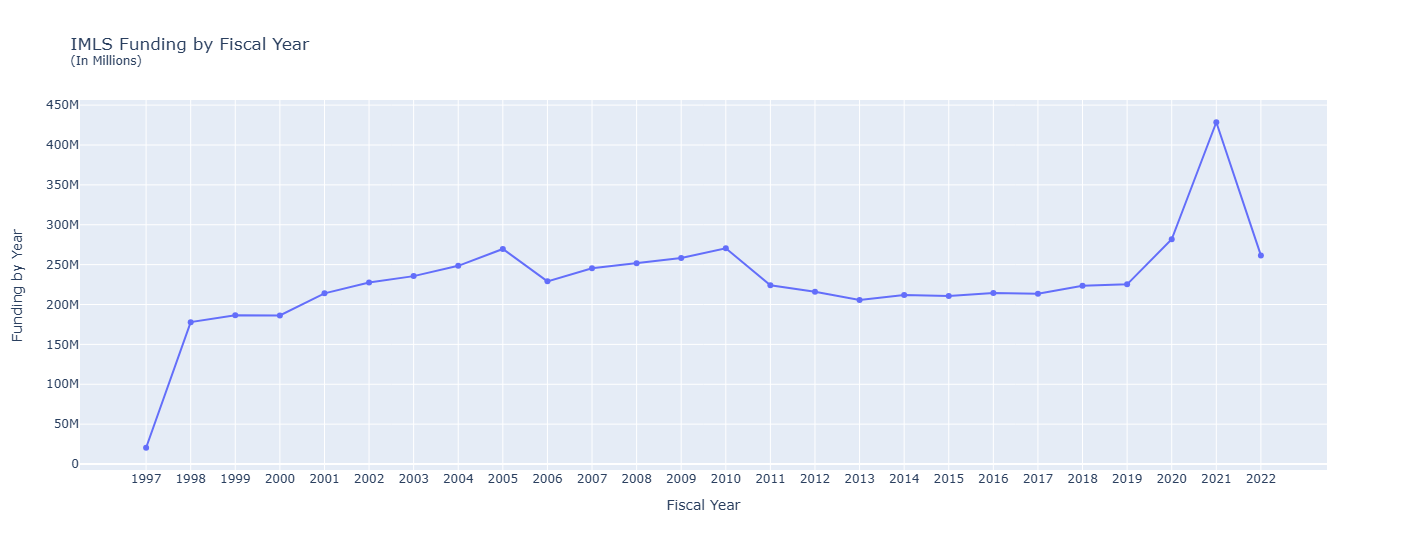

In [91]:
# 1. What was the trend in total funding from 1997-2022?
fig = px.line(funding_by_year_df, x='Fiscal Year', y='Funding by Year', title='IMLS Funding by Fiscal Year<br><sup>(In Millions)</sup>', markers=True, height=550)

fig.update_xaxes(tickvals=funding_by_year_df['Fiscal Year'])

fig.show()

### Analysis

IMLS funding has generally been trending upwards from 1997 to 2022. There were two major funding increases: first one span 1997-1998 and second one span 2020-2021. One potential reason for the latter increase was libraries, and museum services began to serve the public after the COVID-19 pandemic. There was a major decrease spanning from 2021-2022, where funding decreased back to the 2020 level. Besides the major increases and decrease, funding generally hovered from 200M to 270M.   

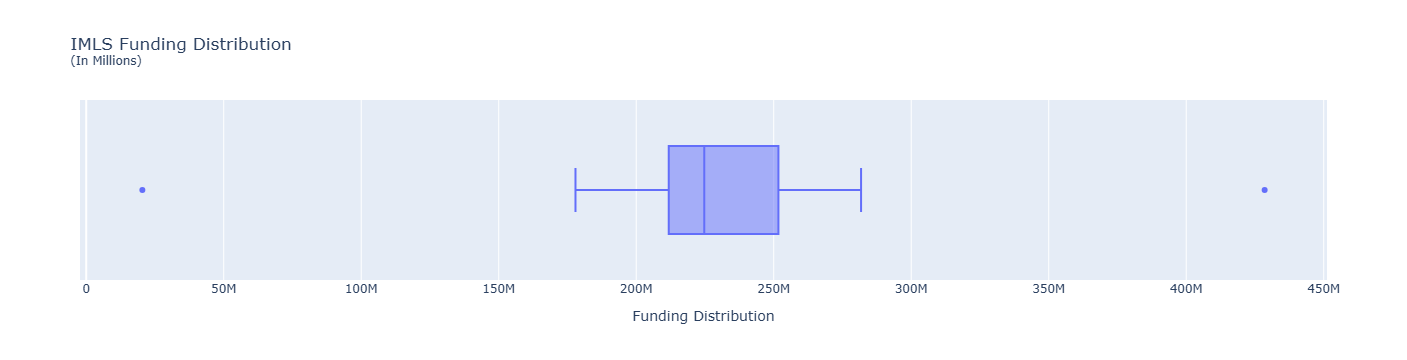

In [92]:
# 2. What was the funding distribution from 1997-2022?
fig = px.box(funding_by_year_df, x='Funding by Year', title='IMLS Funding Distribution<br><sup>(In Millions)</sup>')

fig.update_layout(xaxis_title='Funding Distribution',
                 width=150)

fig.show()

### Analysis

This is a boxplot of IMLS funding. The lower and upper fence (portrayed by the lines from each side of the box) values were 177.91M to 281.76M, respectively. The median value was 224.74M. The 25th and 75th percentile values were 211.82M and 251.70M, respectively. The minimum value was 20.40M. The maximum value was 428.52M.   

In [93]:
# Top 10 cities in funding 
# groupby city and state since many states have the same cities name
top_cities_funding = final_df.groupby(['City', 'State'])['Federal Funds'].sum().sort_values(ascending=False).head(10)


top_cities_df = pd.DataFrame({'Funding': top_cities_funding}).reset_index()

# combine city and state to one column for clarity
top_cities_df['City_State'] = top_cities_df['City'] + ", " + top_cities_df['State']

In [94]:
# Top 10 states in funding 
top_states_funding = final_df.groupby('State')['Federal Funds'].sum().sort_values(ascending=False).head(10)


top_states_df = pd.DataFrame({'Funding': top_states_funding}).reset_index()

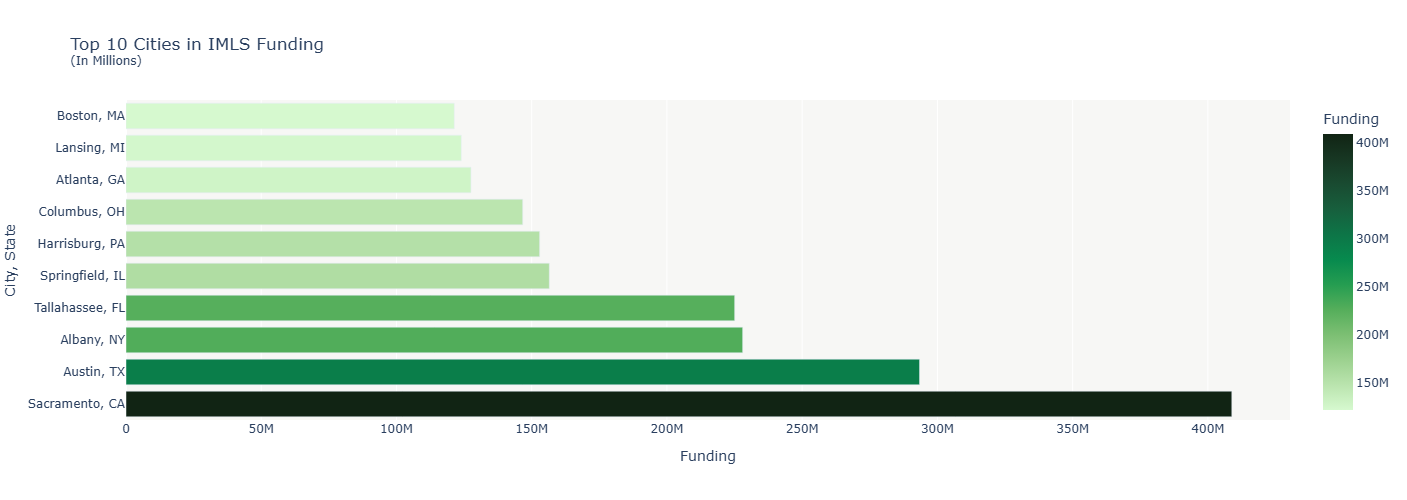

In [95]:
# 3. What was the top 10 cities vs states in funding from 1997-2022?
fig = px.bar(top_cities_df, x='Funding', y='City_State', orientation='h', 
             labels={'City_State': 'City, State'}, 
             title='Top 10 Cities in IMLS Funding<br><sup>(In Millions)</sup>',
             color='Funding',
             color_continuous_scale='algae')

fig.update_layout(height=500,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

The top 10 cities in IMLS funding were all from different states. Sacramento, CA received the most funding at 408M. The next city was Austin, TX received 293M, almost an 115M drop from Sacramento. Tallahassee, FL and Albany, NY received fairly similar level of funding at 225M. Next, Springfield, IL; Harrisburg, PA; and Columbus, OH received fairly similar level of funding at 152M. Atlanta, GA; Lansing, MI; and Boston, MA received fairly similar level of funding at 123M.  

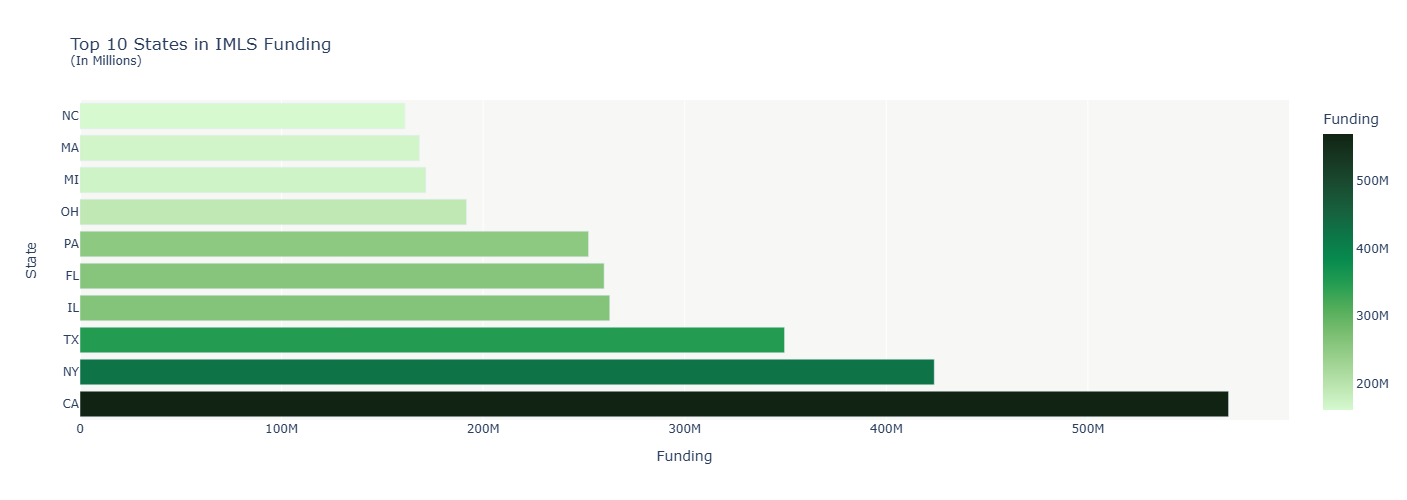

In [96]:
# 3. What was the top 10 cities vs states in funding from 1997-2022?
fig = px.bar(top_states_df, x='Funding', y='State', orientation='h', title='Top 10 States in IMLS Funding<br><sup>(In Millions)</sup>',
             color='Funding',
             color_continuous_scale='algae')

fig.update_layout(height=500,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

The top 10 states in IMLS funding were fairly similar to the top 10 cities in IMLS funding (seen above) except for North Carolina. California received the most funding at 569M. NY received 74M more in funding than TX, suggesting most funding received by TX went towards libraries and museum services in Austin. IL, FL, and PA received fairly similar funding at 260M, suggesting there are other cities in those states that account for the remainder of the funding. Similar conclusions also applied to OH, MI, MA, and NC.     

In [97]:
# top programs in funding
top_programs_funding = final_df.groupby('Program')['Federal Funds'].sum().sort_values(ascending=False).head(10)

top_programs_df = pd.DataFrame({'Funding': top_programs_funding}).reset_index()

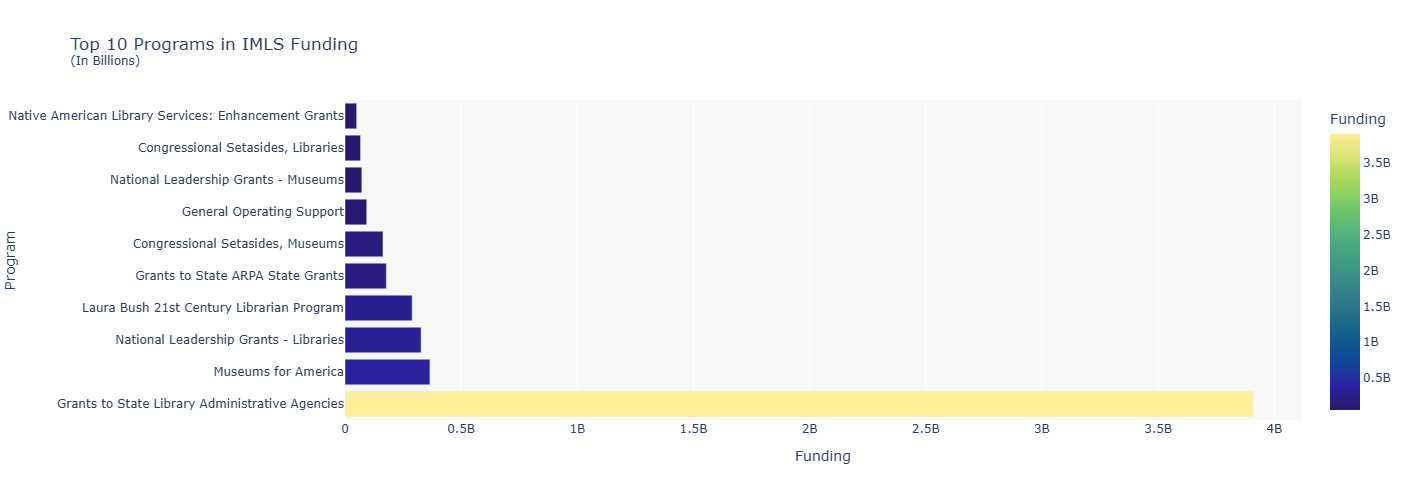

In [98]:
# 4. What was the top 10 programs that received the most funding?
fig = px.bar(top_programs_df, x='Funding', y='Program', orientation='h', title='Top 10 Programs in IMLS Funding<br><sup>(In Billions)</sup>',
             color='Funding',
             color_continuous_scale='haline')

fig.update_layout(height=500,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

The top 10 programs in IMLS funding consisted of libraries and museums services. Grants to State Library Administrative Agencies (GSLAA) received the most funding at 3.9B, significantly higher than other programs. Grants to State ARPA State Grants were established to help aid state and local governemnts in pandemic response and recovery. General Operating Support were established to support library and museum services in educating the community.   

In [99]:
# funding by office
funding_by_office = final_df.groupby('Funding Office')['Federal Funds'].sum()

funding_by_office_df = pd.DataFrame({'Funding': funding_by_office}).reset_index()

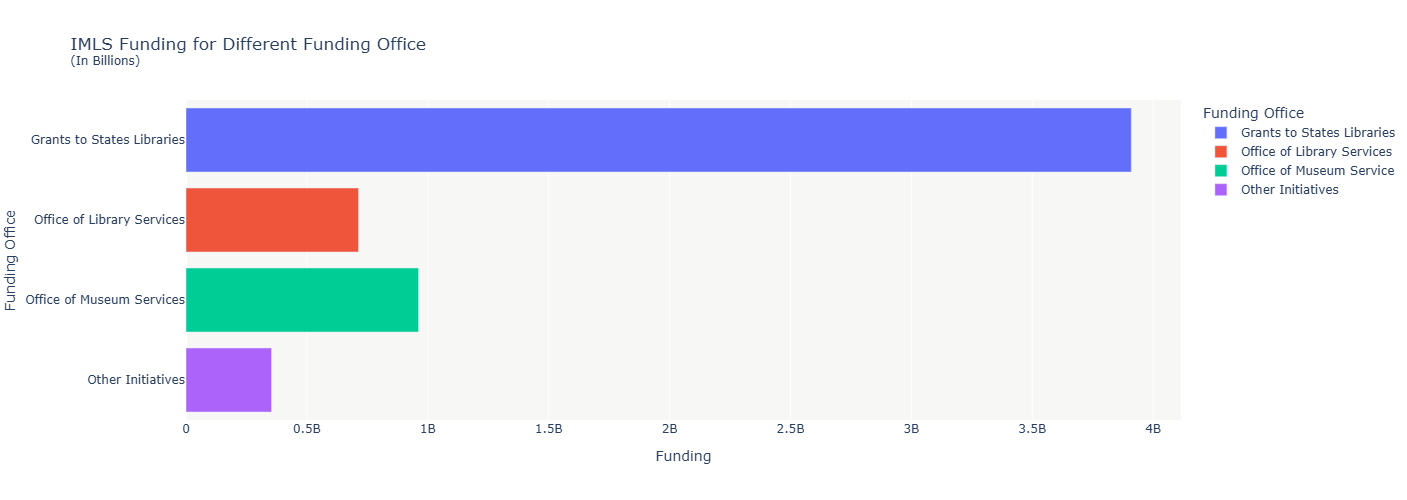

In [100]:
# 5. Which funding office received the most funding?
fig = px.bar(funding_by_office_df, x='Funding', y='Funding Office', orientation='h', title='IMLS Funding for Different Funding Office<br><sup>(In Billions)</sup>',
             color='Funding Office')

fig.update_layout(height=500,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

Grants to States Libraries received the most funding at 3.9B, significantly higher than other funding offices. The grant supported various public, academic, research, school, and special libraries in their respective states, categorized to GSLAA program (seen above). Office of Museum Services received the second-most funding at 961.91M, which support various museums of all sizes and disciplines. Office of Library Services and Other Initiatives combined for over 1B in funding to support IMLS mission. 

In [101]:
# get house party value count
house_party_count = congress_df['House'].value_counts() # use congress df due to matching row for year and house only occurs once

house_party_df = pd.DataFrame({'Value Count': house_party_count}).reset_index().rename(columns={'index': 'Party'}) # change index column to party

In [102]:
# get senate party value count
senate_party_count = congress_df['Senate'].value_counts() # use congress df due to matching row for year and senate only occurs once

senate_party_df = pd.DataFrame({'Value Count': senate_party_count}).reset_index().rename(columns={'index': 'Party'}) # change index column to party

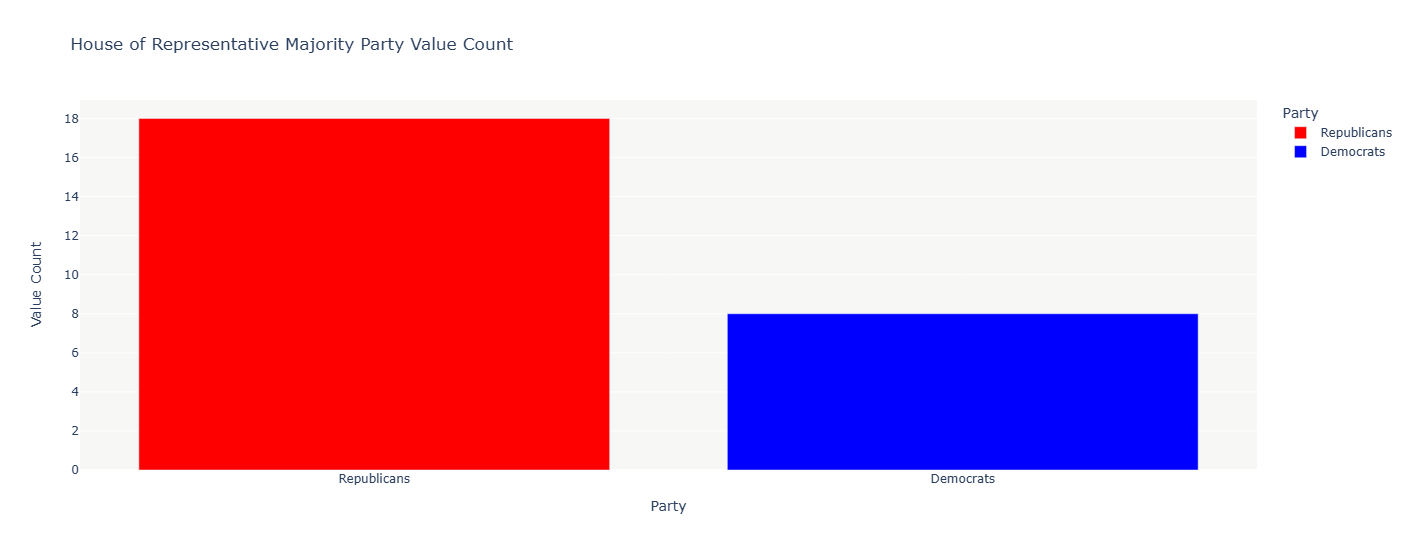

In [103]:
# 6. How many Democrat/Republican Congress (House and Senate) were there? 
fig = px.bar(house_party_df, x='Party', y='Value Count', title='House of Representative Majority Party Value Count',
             color='Party',
             color_discrete_map={'Republicans': 'red',
                                'Democrats': 'blue'})

fig.update_layout(height=550,
                  width=750,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

From 1997-2022, the Republican party held the majority party in the House of Representatives 18 times while the Democrat party held only 8 times. 

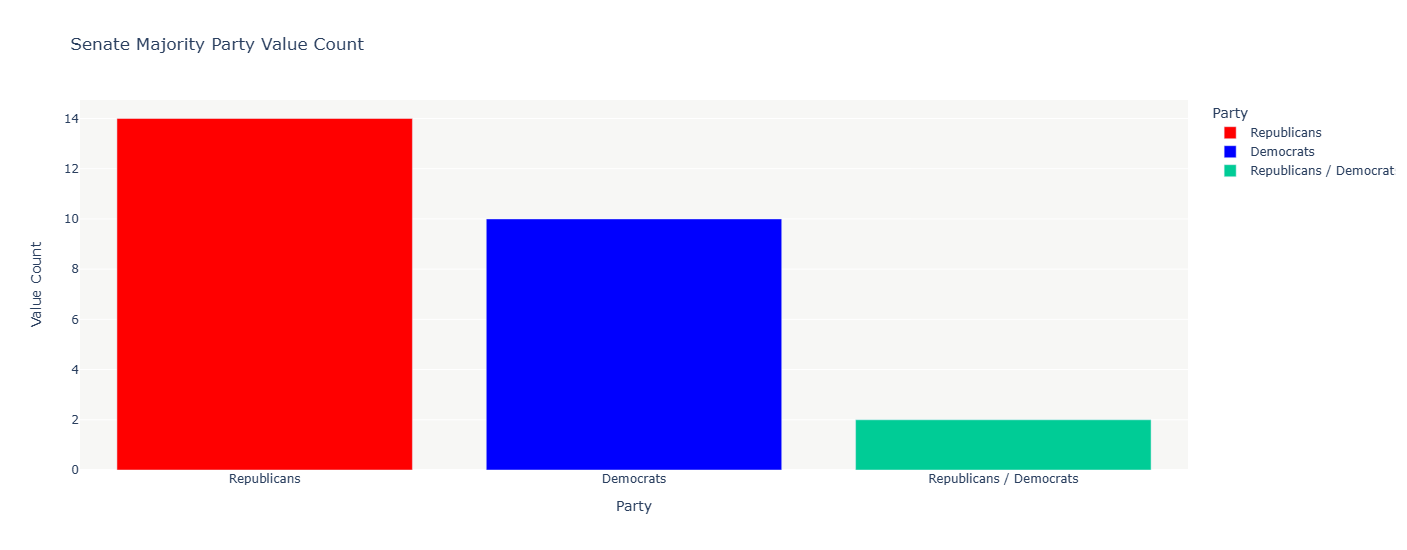

In [104]:
# 6. Which political party dominates Congress (House and Senate) the most? 
fig = px.bar(senate_party_df, x='Party', y='Value Count', title='Senate Majority Party Value Count',
             color='Party',
             color_discrete_map={'Republicans': 'red',
                                'Democrats': 'blue'})

fig.update_layout(height=550,
                  width=750,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

From 1997-2022, the Republican party held the majority party 14 times while the Democrat party held 10 times. For 107th Congress (2001-2003), there were several majority party changes, reflected in the value count of Republicans/Democrats (light green).  

In [105]:
# get President's party value count
pres_count = congress_df['Presidency'].value_counts()

pres_df = pd.DataFrame({'Value Count': pres_count}).reset_index().rename(columns={'index': 'Presidency'}) # change index column to party

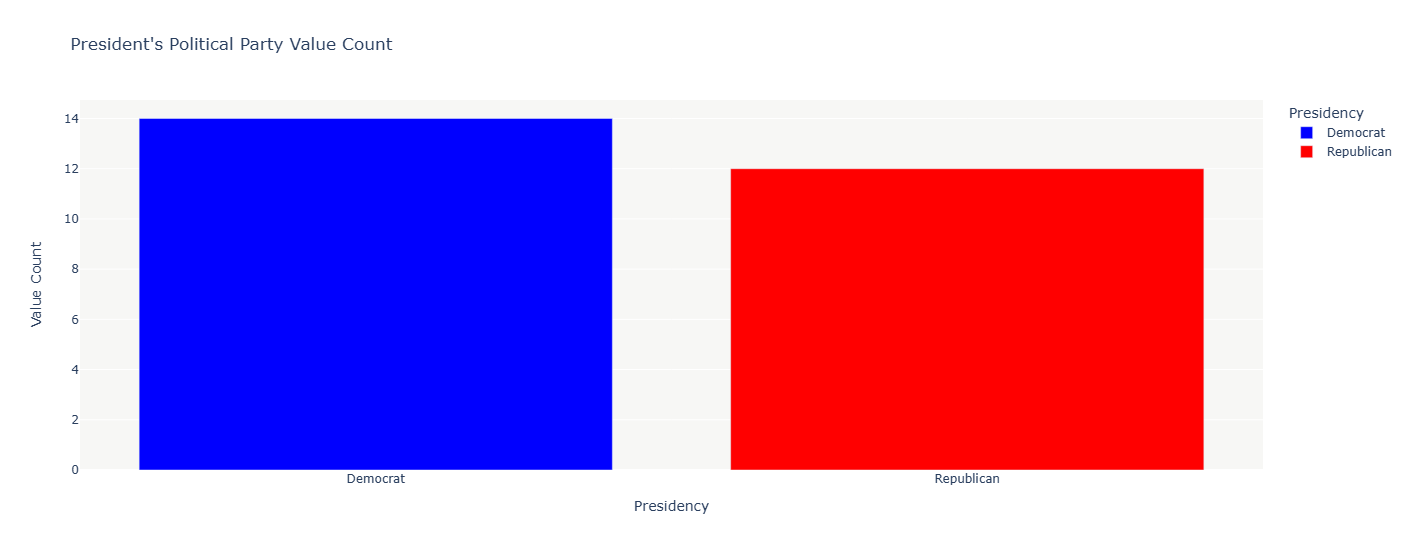

In [106]:
# 7. How many Democrat/Republican President were there? 
fig = px.bar(pres_df, x='Presidency', y='Value Count', title="President's Political Party Value Count",
             color='Presidency',
             color_discrete_map={'Republican': 'red',
                                'Democrat': 'blue',
                                'Republican/Democrat': 'yellow'})

fig.update_layout(height=550,
                  width=750,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

From 1997-2022, the majority party of the President was Democrat at 14 times while the Republican party held 12 times.  

In [107]:
# percent of time party gov have unified control
party_prop = congress_df['Party Government'].value_counts(normalize=True)

# convert proportions to percentages
party_perc = round((party_prop * 100), 2)

party_prop_df = pd.DataFrame({'Percentage': party_perc}).reset_index().rename(columns={'index': 'Party Government'}) # change index column to party gov

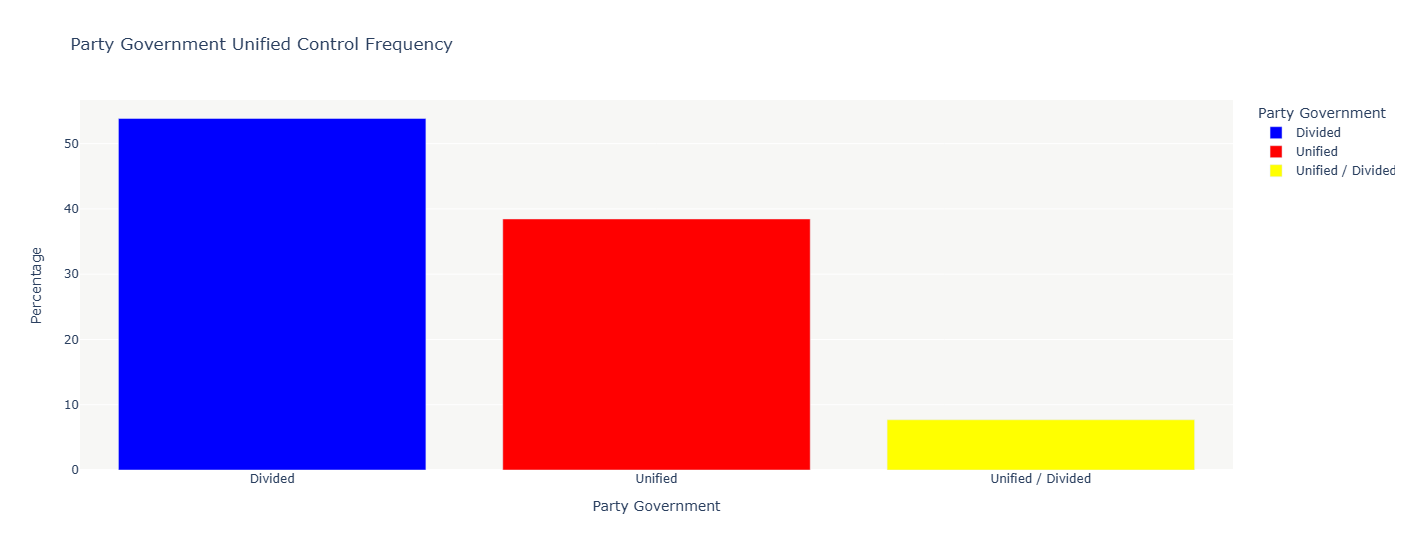

In [108]:
# 8. What percent of the time did the party government have unified control?
fig = px.bar(party_prop_df, x='Party Government', y='Percentage', title='Party Government Unified Control Frequency',
             color='Party Government',
             color_discrete_map={'Unified': 'red',
                                'Divided': 'blue',
                                 'Unified / Divided': 'yellow'})

fig.update_layout(height=550,
                  width=750,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

From 1997-2022, the party government was divided at 53.85% (14 times) and unified at 38.46% (10 times). The party government was unified/divided at 7.69% (2 times) reflecting the 107th Congressional term where there were party switches in the Senate. 

In [109]:
# funding by party government
funding_gov = final_df.groupby('Party Government')['Federal Funds'].sum()

funding_gov_df = pd.DataFrame({'Funding': funding_gov}).reset_index()

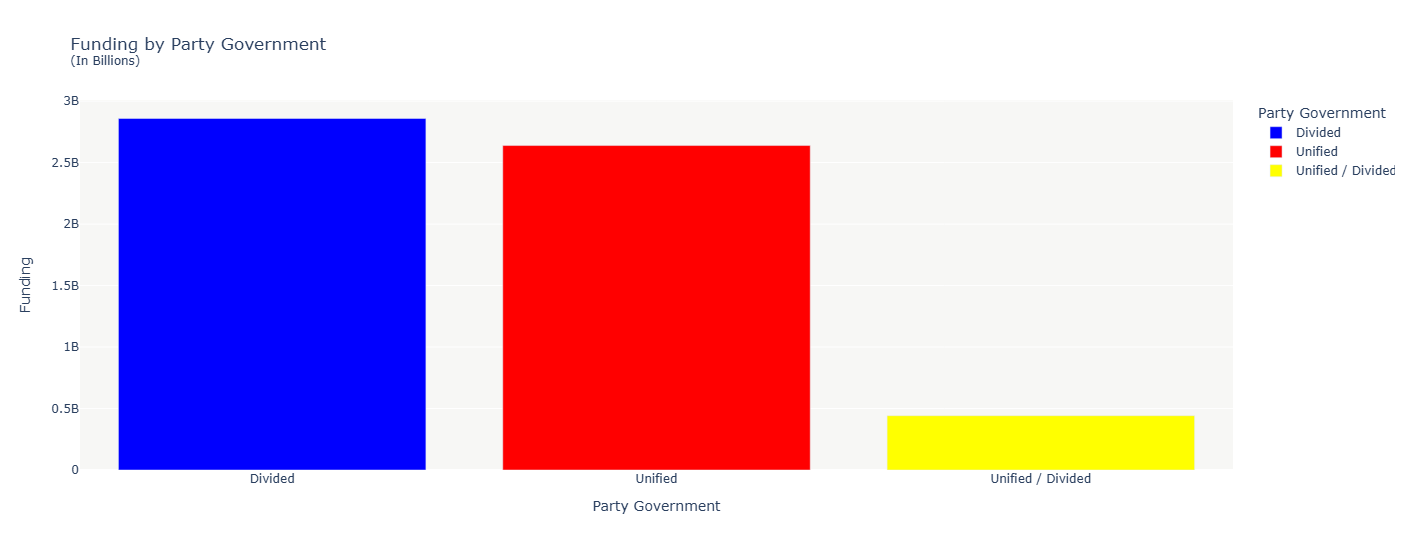

In [110]:
# 9. Did unified party government received more funding than divided party government?
# 9a. If unified, which political party accounted for the most funding?
fig = px.bar(funding_gov_df, x='Party Government', y='Funding', title='Funding by Party Government<br><sup>(In Billions)</sup>',
             color='Party Government',
             color_discrete_map={'Unified': 'red',
                                'Divided': 'blue',
                                 'Unified / Divided': 'yellow'})

fig.update_layout(height=550,
                  width=750,
                  plot_bgcolor='#f7f7f5')

fig.show()

### Analysis

The divided party government received the most funding at 2.85B while the unified party government received slightly less funding at 2.63B. The unified/divided party government received 441.70M in funding. 

In [111]:
# funding by state
funding_states = final_df.groupby('State')['Federal Funds'].sum()

funding_states_df = pd.DataFrame({'Funding': funding_states}).reset_index()

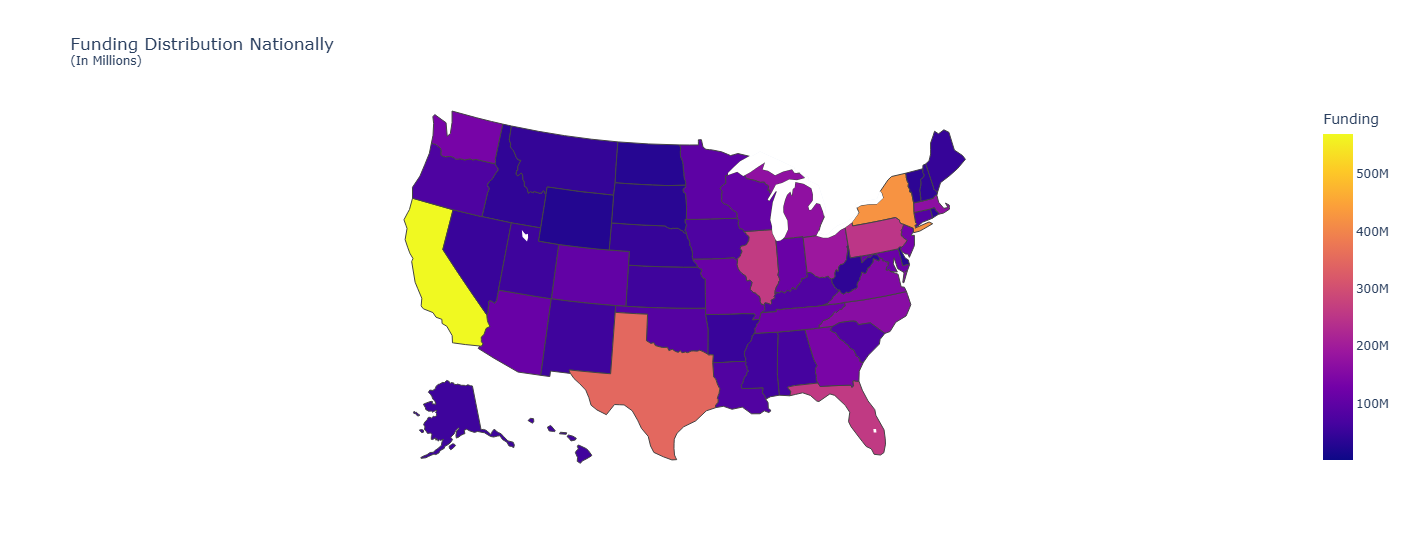

In [112]:
# 10. What is the national funding distribution? 
fig = px.choropleth(funding_states_df, color='Funding', locations='State', locationmode='USA-states', 
                    scope='usa', 
                    title='Funding Distribution Nationally<br><sup>(In Millions)</sup>')

fig.update_layout(height=550,
                  width=1000)

fig.show()

### Analysis

The choloropleth plot shows a map of funding received by 50 states from 1997-2022. The Northwest states besides WA (MT, ID, WY) and ND, SD received low spending from 26-44M. A few Northeastern states (ME, NH, VT, and RI) also received low spending from 37-47M. Most states received spending from 86M to 150M. The top 10 states in funding shown above are shown here such as (CA, TX, NY, PA, and OH). 

## Reference

1) https://www.imls.gov/about/learn-about-imls/our-mission-vision
2) https://www.ala.org/faq-executive-order-targeting-imls